In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 19 19:29:30 2018

@author: karthikranjan
"""
import numpy as np
import re
import pickle 
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
import heapq


In [14]:
# Unpickling  pre-processed dataset

X_in = open('PreProcessedData.pickle','rb')
y_in = open('y.pickle','rb')
z_in = open('z.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)
z = pickle.load(z_in)

In [15]:
import numpy
# fix random seed for reproducibility
numpy.random.seed(777)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
# Creating the Tf-Idf Model --Filter Model approach

transformer = TfidfTransformer(sublinear_tf=True)
X = transformer.fit_transform(X).toarray()
text_train = transformer.fit_transform(text_train).toarray()
text_test = transformer.transform(text_test).toarray()


In [18]:
# Shape of train and test documents

print("No. of News Documents: ", X.shape[0])
print("No. of train Documents: ", text_train.shape[0])
print("No. of test Documents: ", text_test.shape[0])
print("No. of Input features: ", text_train.shape[1])


No. of News Documents:  4489
No. of train Documents:  3591
No. of test Documents:  898
No. of Input features:  11810


In [19]:
##########Evaluating Filter model with multinomial naive bayes classifier ##############################

# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

newsGrpNB = MultinomialNB()
newsGrpNB = newsGrpNB.fit(text_train, sent_train)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sent_test, y_test_pred)


In [24]:
############## Building Hybrid Model - BPSO with Multinomial naive bayes classifier ##########################

# Import PySwarms
import pyswarms as ps

# Naive Bayes Classifier - Create an instance of the classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()


In [25]:
# Creating own objective function

# Define objective function
def f_per_particle(m, alpha, count):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = 11810
    print("Count of particles", count)
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = text_train
        #print("%f In if statement" , X_subset)
    else:
        #X_subset = X[:,(np.logical_or(m > 0 , m == 1))]
        X_subset = text_train[:, m > 0]
        #print("%f In else statement" , X_subset)
        
        
    # Perform classification and store performance in P
    classifier.fit(X_subset, sent_train)

    P = (classifier.predict(X_subset) == sent_train).mean()
    #print("p value", P)
    #print("predicted value", classifier.predict(X_subset))
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    count=0
    j = [f_per_particle(x[i], alpha, count+i) for i in range(n_particles)]
    #for i in range(n_particles):
        #print("position of i", i)
        #j = [f_per_particle(x[i], alpha)]
        
    return np.array(j)

In [26]:
# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = 11810 # dimensions should be the number of features

optimizer = ps.discrete.BinaryPSO(n_particles=35, dimensions=dimensions, options=options)

#f = f(X, 0.88)
# Perform optimization - to select the subset of features
cost, pos = optimizer.optimize(f, print_step=5, iters=10, verbose=2)

Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of particles 11
Count of particles 12
Count of particles 13
Count of particles 14
Count of particles 15
Count of particles 16
Count of particles 17
Count of particles 18
Count of particles 19
Count of particles 20
Count of particles 21
Count of particles 22
Count of particles 23
Count of particles 24
Count of particles 25
Count of particles 26
Count of particles 27
Count of particles 28
Count of particles 29
Count of particles 30
Count of particles 31
Count of particles 32
Count of particles 33
Count of particles 34
Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of

INFO:pyswarms.discrete.binary:Iteration 1/10, cost: 0.17814919460661255


Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of particles 11
Count of particles 12
Count of particles 13
Count of particles 14
Count of particles 15
Count of particles 16
Count of particles 17
Count of particles 18
Count of particles 19
Count of particles 20
Count of particles 21
Count of particles 22
Count of particles 23
Count of particles 24
Count of particles 25
Count of particles 26
Count of particles 27
Count of particles 28
Count of particles 29
Count of particles 30
Count of particles 31
Count of particles 32
Count of particles 33
Count of particles 34
Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of

INFO:pyswarms.discrete.binary:Iteration 6/10, cost: 0.15608810529475448


Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of particles 11
Count of particles 12
Count of particles 13
Count of particles 14
Count of particles 15
Count of particles 16
Count of particles 17
Count of particles 18
Count of particles 19
Count of particles 20
Count of particles 21
Count of particles 22
Count of particles 23
Count of particles 24
Count of particles 25
Count of particles 26
Count of particles 27
Count of particles 28
Count of particles 29
Count of particles 30
Count of particles 31
Count of particles 32
Count of particles 33
Count of particles 34
Count of particles 0
Count of particles 1
Count of particles 2
Count of particles 3
Count of particles 4
Count of particles 5
Count of particles 6
Count of particles 7
Count of particles 8
Count of particles 9
Count of particles 10
Count of

INFO:pyswarms.discrete.binary:================================
Optimization finished!
Final cost: 0.1561
Best value: [ 1.000000 1.000000 0.000000 ...]



In [27]:
# Pickling/storing the Selected features in the system - 
with open('pos_NaiveBayes.pickle','wb') as f:
    pickle.dump(pos,f)

In [29]:
# Get the selected features from the final positions

text_train = text_train[:,pos==1] # Subset
text_test = text_test[:,pos==1] # Subset


In [30]:
#Shape of selected features subset
print("shape of the selected subset of features by BPSO", text_train.shape[1])

shape of the selected subset of features by BPSO 6891


In [31]:
# Create and initiate a Multinomial naive Bayes Classifier

newsGrpNB = MultinomialNB()
newsGrpNB = newsGrpNB.fit(text_train, sent_train)

y_train_pred = newsGrpNB.predict(text_train)
y_test_pred = newsGrpNB.predict(text_test)

print("Train Accuracy Score of hybrid model BPSO :", metrics.accuracy_score(sent_train, y_train_pred) )

print("Test Accuracy Score of hybrid model BPSO :", metrics.accuracy_score(sent_test, y_test_pred) )

Train Accuracy Score of hybrid model BPSO : 0.8727373990531885
Test Accuracy Score of hybrid model BPSO : 0.821826280623608


In [32]:
# Compute performance - Entire Subset Performance

# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset

subset_performance = (newsGrpNB.predict(X_selected_features) == y).mean()
print("Performance of Selected features from BPSO: ", subset_performance)

Performance of Selected features from BPSO:  0.8625529071062598


In [33]:
#K- fold cross validation
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
Nb = MultinomialNB()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(Nb, X_selected_features, y, cv=5, scoring='accuracy')
print("5 fold cross validaton scores with PSO: ", scores)

print("5 fold Average - cross validaton scores with PSO: ", np.average(scores))

5 fold cross validaton scores with PSO:  [0.83648498 0.79866518 0.8131257  0.79041249 0.80893855]
5 fold Average - cross validaton scores with PSO:  0.8095253791239317


In [34]:
print(" Result : Classfication Report of hybrid model ")
print(metrics.classification_report(sent_test, y_test_pred))

 Result : Classfication Report of hybrid model 
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       190
          1       0.92      0.90      0.91       213
          2       0.80      0.85      0.82       198
          3       0.74      0.90      0.81       173
          4       0.96      0.44      0.60       124

avg / total       0.84      0.82      0.81       898



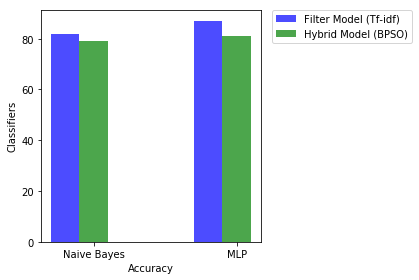

In [69]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2

accuracy_filter_model = (82, 87)
accuracy_hybrid_model = (79, 81)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.7
 
rects1 = plt.bar(index, accuracy_filter_model, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Filter Model (Tf-idf)')
 
rects2 = plt.bar(index + bar_width, accuracy_hybrid_model, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Hybrid Model (BPSO)')

plt.xlabel('Accuracy')
plt.ylabel('Classifiers')
#plt.title('Performance of filter and hybrid models for topic classification')
plt.xticks(index + bar_width, ('Naive Bayes', 'MLP'))
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 
plt.tight_layout()
plt.show()